# Introduction

This project covers customer segmentation of Olist E-commerce in Brazil

## Background

In every business, including e-commerce, customer behavior differs from person to person. But there are always some similar characteristics between a group of customers and also some differentiating characteristics[1]. We can leverage these differences and similarities to separate the customers into a couple of groups, and then use those groups’ characteristics to further understand the customers. Using this knowledge, the business can learn about the shopping behavior of different kinds of customers and develop different products for each customer group. This process is known as customer segmentation. When we understand the customers characteristics, we can analyze the relationships between customers and the e-commerce business itself, and it can provide the company with information about what the customers are expecting. By acting on the results of these analyses, the company can increase customer engagement by enhancing customer satisfaction and loyalty[2]. This will also lead to better customer relationship management (CRM) and improved CRM can lead to improved customer acquisition, customer retention, and customer profitability[3]. Some other potential benefits of CRM are as follows: (1) Increased customer retention and loyalty, (2) Higher customer profitability, (3) Creation value for the customer, (4) Customization of products and services, and (5) Lower process, higher quality products and services[7].

## Problem Statement

Based on the background, we can get the problem statement as shown below:

*   Group customers based on their behavior so that they are divided into several segments.
*   Find out the defining characteristics in each customer segment.




In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import time
import datetime as dt
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

# Load Dataset

In [2]:
customers = pd.read_csv('Dataset/olist_customers_dataset.csv')
geolocation = pd.read_csv('Dataset/olist_geolocation_dataset.csv')
order_items = pd.read_csv('Dataset/olist_order_items_dataset.csv')
order_payments = pd.read_csv('Dataset/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('Dataset/olist_order_reviews_dataset.csv')
orders = pd.read_csv('Dataset/olist_orders_dataset.csv')
products = pd.read_csv('Dataset/olist_products_dataset.csv')
sellers = pd.read_csv('Dataset/olist_sellers_dataset.csv')
category_name = pd.read_csv('Dataset/product_category_name_translation.csv')

# Data Description


Each feature or columns of different dataset are described below:

* The  `customers` contain following features:

Feature | Description 
----------|---------------
**customer_id** | key to the orders dataset. Each order has a unique customer_id.
**customer_unique_id**    | unique identifier of a customer.
**customer_zip_code_prefix** | first five digits of customer zip code
**customer_city** | customer city name.
**customer_state** |  customer state.

* The `sellers` contains following features:

Feature | Description 
----------|---------------
**seller_id** |   seller unique identifier.
**seller_zip_code_prefix** | first 5 digits of seller zip code.
**seller_city** | seller city name.
**seller_state** | seller state.


* The `order_items`  contain following features:

Feature | Description 
----------|---------------
**order_id** | order unique identifier.
**order_item_id** | sequential number identifying number of items included in the same order.
**product_id** |product unique identifier.
**seller_id** | seller unique identifier.
**shipping_limit_date** | Shows the seller shipping limit date for handling the order over to the logistic partner.
**price** | item price.
**freight_value** | item freight value item (if an order has more than one item the freight value is splitted between items). 

* The `order_payments` contain following features:

Feature | Description 
----------|---------------
**order_id** | unique identifier of an order.
**payment_sequential** | a customer may pay an order with more than one payment method. If he does so, a sequence will be created to.
**payment_type** |  method of payment chosen by the customer.
**payment_installments** | number of installments chosen by the customer.
**payment_value** | transaction value.



* The `orders`  contain following features:

Feature | Description 
----------|---------------
**order_id** | unique identifier of the order.
**customer_id** | key to the customer dataset. Each order has a unique customer_id.
**order_status** | Reference to the order status (delivered, shipped, etc).
**order_purchase_timestamp** | Shows the purchase timestamp.
**order_approved_at** | Shows the payment approval timestamp.
**order_delivered_carrier_date** | Shows the order posting timestamp. When it was handled to the logistic partner.
**order_delivered_customer_date** | Shows the actual order delivery date to the customer.
**order_estimated_delivery_date** | Shows the estimated delivery date that was informed to customer at the purchase moment.


* The `order_reviews`  contain following features:

Feature | Description 
----------|---------------
**review_id** |unique review identifier.
**order_id** |  unique order identifier.
**review_score** | Note ranging from 1 to 5 given by the customer on a satisfaction survey.
**review_comment_title** | Comment title from the review left by the customer, in Portuguese.
**review_comment_message** | Comment message from the review left by the customer, in Portuguese.
**review_creation_date** |Shows the date in which the satisfaction survey was sent to the customer.
**review_answer_timestamp** | Shows satisfaction survey answer timestamp.


* The `products` contain following features:

Feature | Description 
----------|---------------
**product_id** | unique product identifier.
**product_category_name** | root category of product, in Portuguese.
**product_name_lenght** | number of characters extracted from the product name.
**product_description_lenght** | number of characters extracted from the product description.
**product_photos_qty** | number of product published photos.
**product_weight_g** | product weight measured in grams.
**product_length_cm** | product length measured in centimeters.
**product_height_cm** | product height measured in centimeters.
**product_width_cm** | product width measured in centimeters.


* The `geolocation` contain following features:

Feature | Description 
----------|---------------
**geolocation_zip_code_prefix** | first 5 digits of zip code.
**geolocation_lat** | latitude.
**geolocation_lng** | longitude.
**geolocation_city** | city name.
**geolocation_state** | state.


* The `category_name` contain following features:

Feature | Description 
----------|---------------
**product_category_name** | category name in Portuguese.
**product_category_name_english** | category name in English.



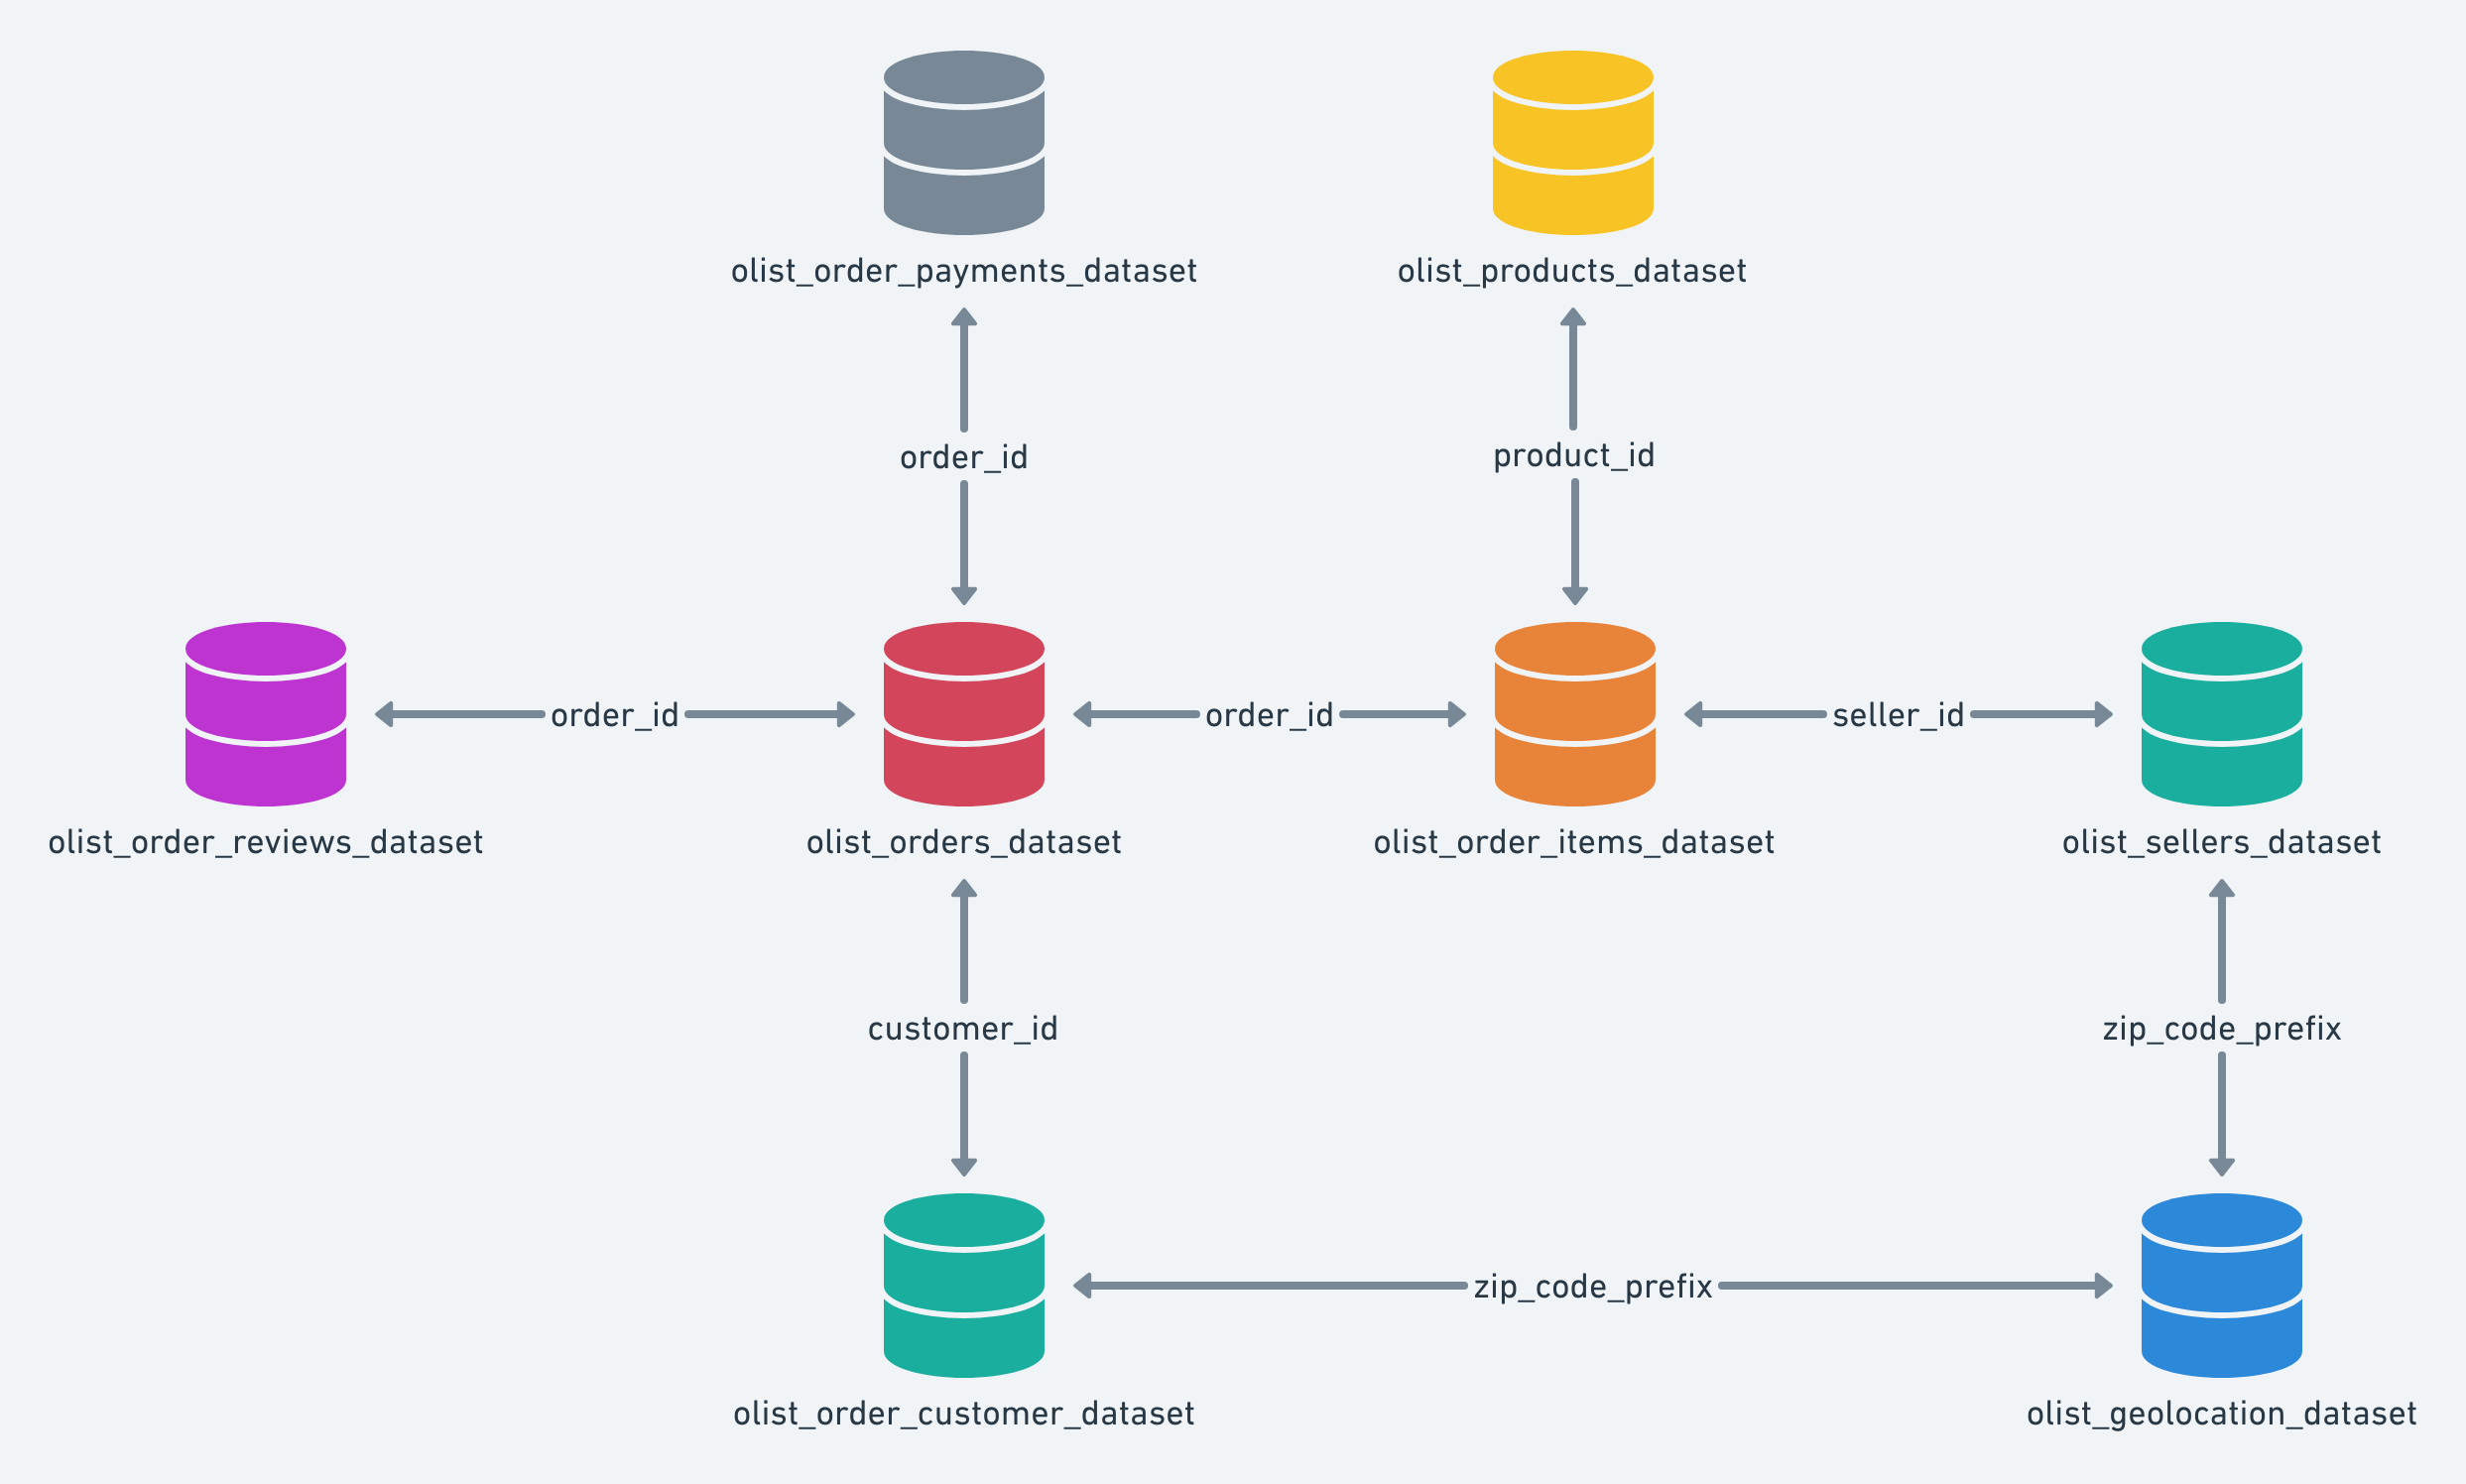

In [3]:
my_image = 'Images/Dataset schema.png'
Image(my_image)

We are going to analyze each tables individually.

# Data Understanding

## Customers Table

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
customers['customer_unique_id'].nunique()

96096

In [7]:
customers[customers.duplicated(subset='customer_unique_id')]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
679,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,299f7b5125c8fbe1761a1b320c34fc7d,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,226d59f9f4b98e228b689eea45d03a6d,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,b1253701171dfb298f52a221f824e45b,788313d21c3507fe890921f6e17aa679,11070,santos,SP
...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


In [8]:
customers[customers['customer_unique_id'] == 'b6c083700ca8c135ba9f0f132930d4e8']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
132,f7c5afab273b47ab517e096e0219b932,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
679,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP


There are 99,441 rows in this table, but only 96,096 different values of `customer_unique_id` which means that some rows contain the same `customer_unique_id` column. But upon further examination, it turns out that those customers that are present in more than 1 row have different `customer_id`, which means that they ordered more than once because in each order, a customer is given a different customer id. Because of this, we cannot delete the duplicated rows because we need the `customer_id` information to assign each customer to their orders.

## Order items table

In [9]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [10]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
order_items['order_id'].nunique()

98666

In [12]:
# change shipping limit date format to datetime
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

In [13]:
order_items = pd.merge(left=order_items, right=order_items.groupby('order_id')['order_item_id'].max().reset_index().rename({'order_item_id': 'items_in_order'}, axis=1), on='order_id', how='left')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,items_in_order
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1


In [14]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
 7   items_in_order       112650 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 7.7+ MB


There are 112,650 rows in this table, but only 98,666 unique `order_id` values because some orders contain more than 1 items. The item number can be found in the `order_item_id` column. Each item is assigned its own item id for every order, starting from 1 onwards. Every row in this table represents 1 item in an order. This table also contains seller info, price and freight value.
The format of `shipping_limit_date` column was changed from string into datetime for easier processing.
We also added a new column, `items_in_order` which represents the number of item in that order. We can get this information by finding the maximum number of `order_item_id` for each `order_id`.

## Order payments table

In [15]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [16]:
order_payments.tail()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58


In [17]:
order_payments[order_payments.duplicated(subset='order_id')]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


In [18]:
order_payments[order_payments['order_id'] == '2cbcb371aee438c59b722a21d83597e0']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1793,2cbcb371aee438c59b722a21d83597e0,1,credit_card,5,52.18
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80


In [19]:
order_payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

1 order can be paid by different payment types, where a sequential payment row will be created to accommodate the different payment types and different values. So each row in the table represents the different sequential payment for each order. If the order was paid using 1 type of payment, then there is only 1 row for that `order_id`, but if it was paid using more than 1 type of payment, then there is more than 1 row for the `order_id`. Payment installments, on the other hand, represents the number of installments that a customer paid using a certain payment type.

## Order reviews table

In [20]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [21]:
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [22]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [23]:
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])

In [24]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


There are 99,224 reviews which each corresponds to the `order_id` in each row. When making a review the least a customer can input is the `review_score` which is why there is no null values in the score. A customer can choose to input `review_comment_title` and `review_comment_message` in Portuguese. `review_creation_date` is the date which the satisfaction survey was sent to the customer, and `review_answer_timestamp` is when the customers filled out the survey.

## Orders table

In [25]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [26]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [27]:
orders['order_id'].nunique()

99441

In [28]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [29]:
#convert columns containing datetime to datetime format
datetime_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                 'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in datetime_cols:
    orders[col] = pd.to_datetime(orders[col])

In [30]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [31]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


The table contains information about each order. Each order is represented as 1 row, each with its own unique `order_id`. There are a number of information regarding the order, including `customer_id` which is the customer id generated for each order. We can connect this with the customer unique id using the Customers table. There is also the `order_status` which states whether the order was delivered, canceled, etc. There are also various timestamps related to each stage of the order approval and delivery, such as `order_purchase_timestamp` and `order_approved_at` which was provided in a string format, but we reformatted it into datetime format for easier preprocessing.

## Products table

In [32]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [33]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [34]:
products['product_id'].nunique()

32951

In [35]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [36]:
# create new column: product volume
products['product_volume_cm3'] = products['product_length_cm'] * products['product_height_cm'] * products['product_width_cm']

In [37]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0


The Products table contains detailed information about every product that is sold on the Olist website. Every row represents each product. We also get the `product_category_name` in Portuguese, `product_name_length`, `product_description_length`, number of photos in the listing, as well as the product weight and dimensions.
The dimensions in this table is represented as the `product_length_cm`, `product_height_cm`, and `product_width_cm`. These features can be summarized as 1 feature that is `product_volume_cm3` which we calculated by multiplying the base dimensions. We are doing this to simplify the modeling because we only need to know if the product is big or small, not necessarily if the product is long or wide or tall.

## Geolocation table

In [38]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [39]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [40]:
geolocation['geolocation_zip_code_prefix'].nunique()

19015

In [41]:
geolocation[geolocation.duplicated(subset='geolocation_zip_code_prefix')]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
2,1046,-23.546129,-46.642951,sao paulo,SP
10,1013,-23.547325,-46.634184,sao paulo,SP
13,1012,-23.548946,-46.634671,sao paulo,SP
14,1037,-23.545187,-46.637855,são paulo,SP
15,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


This table contains information about every `geolocation_zip_code_prefix` and its location information such as latitude and longitude, city, and state. The same `geolocation_zip_code_prefix` can be included in multiple rows which contains different `geolocation_lat` and `geolocation_lng`. This is because the information we have is only the zip code prefix, which means that the actual zip code may differ from one row to another, which is why the location data is different.

We are not using this data in our analysis because we are not going to be looking at the location of the customers themselves.

## Sellers table

In [42]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [43]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [44]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

This table contains information about each seller who are selling their products on the Olist website and their locations.

In this project, we are analyzing the customer behavior, with no relation to the seller information, so we are not using this table.

## Category name table

In [45]:
category_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [46]:
category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


This table contains translations of the Portuguese product category name to the English version. We will not be using this table because we are not going to be using the category name information.

# Creating Analytics Base Table

We are merging the relevant tables, with customers as the main table because we want to get all the relevant information about each customer.

In [47]:
# merge the tables
df_customer_order = pd.merge(left=customers, right=orders, on='customer_id', how='left')
df_customer_order_payments = pd.merge(left=df_customer_order, right=order_payments , on='order_id', how='left')
df_customer_order_items = pd.merge(left=df_customer_order_payments, right=order_items, on='order_id', how='left')
df_customer_order_products = pd.merge(left=df_customer_order_items, right=products, on='product_id', how='left')
df_merged = pd.merge(left=df_customer_order_products, right=order_reviews[['order_id', 'review_score']], on='order_id', how='left')

## Exploratory Data Analysis

Text(0, 0.5, '# Customers')

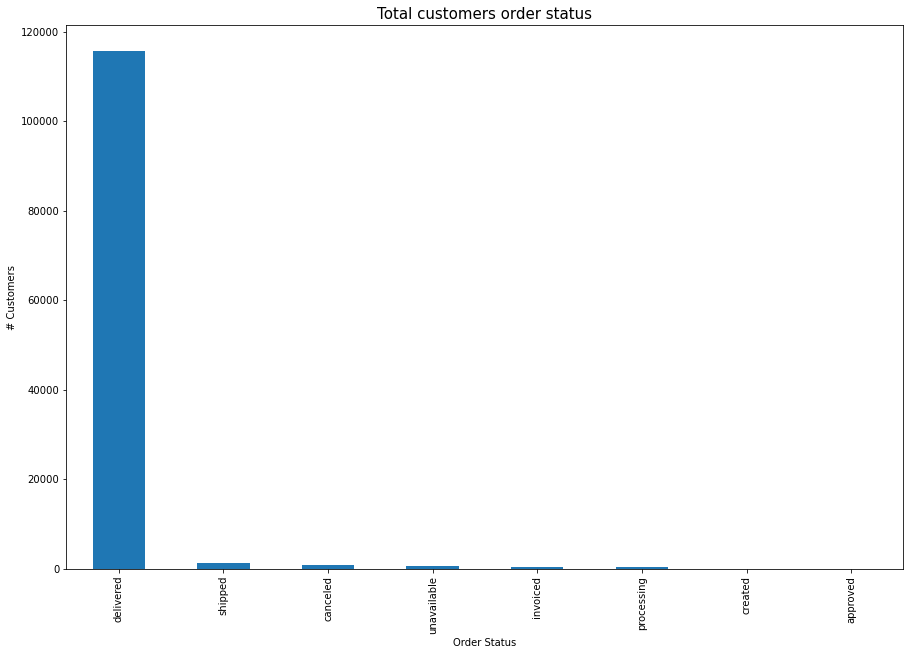

In [48]:
plt.figure(figsize=(15,10))
df_merged.groupby('order_status')['customer_unique_id'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Total customers order status', fontsize=15)
plt.xlabel('Order Status')
plt.ylabel('# Customers')

Most order status are delivered (which means the order has been completed), but a minority status is either shipped, canceled, unavailable, etc. which means that the order isn't/hasn't been completed, therefore they are not orders that generated revenue for the company. Because of that, we will only be analyzing only delivered orders.

In [49]:
# filter status delivered only
df_merged_delivered = df_merged[df_merged['order_status'] == 'delivered']

In [50]:
df_merged_delivered

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,107136.0,4.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,53400.0,5.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,45968.0,5.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,79968.0,5.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,23625.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,livros_interesse_geral,51.0,489.0,2.0,611.0,22.0,22.0,23.0,11132.0,4.0
119139,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,esporte_lazer,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0,13200.0,5.0
119140,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,beleza_saude,60.0,575.0,1.0,870.0,25.0,20.0,18.0,9000.0,1.0
119141,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,relogios_presentes,59.0,452.0,1.0,710.0,19.0,13.0,14.0,3458.0,5.0


In [51]:
df_merged_delivered.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'items_in_order', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_volume_cm3', 'review_score'],
      dtype='object')

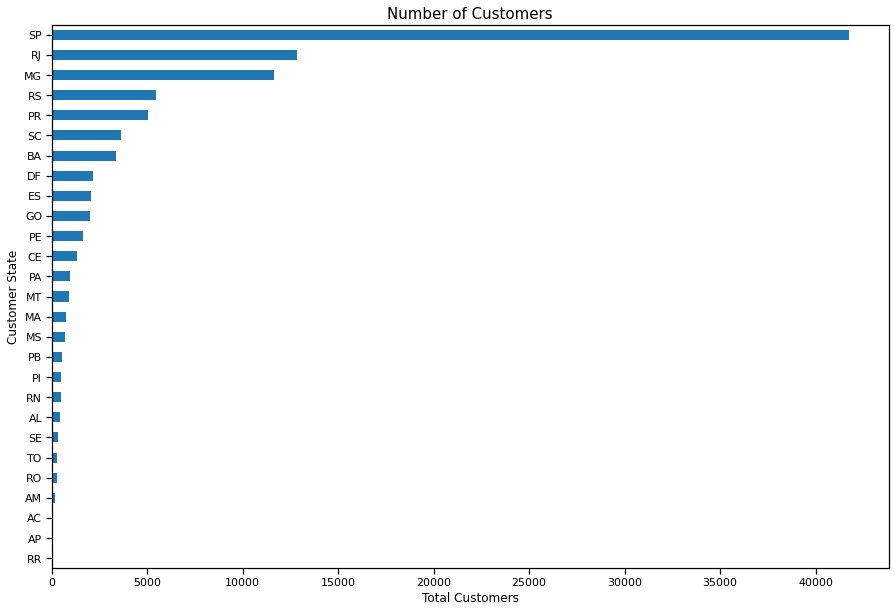

In [52]:
# number of customers in each state
sns.set_context('notebook')
df_customer_count = customers.groupby(customers['customer_state'])['customer_unique_id'].count().sort_values()
df_customer_count.plot(kind='barh',figsize=(15,10))
plt.title('Number of Customers', fontsize=15)
plt.xlabel('Total Customers')
plt.ylabel('Customer State');

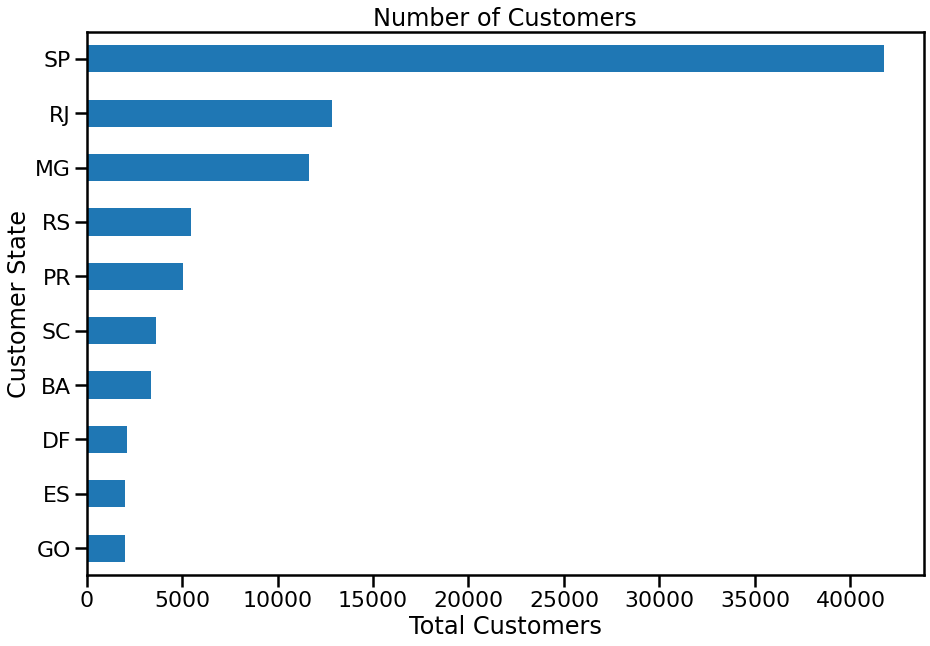

In [53]:
# get top 10 states with the most number of customers
sns.set_context('poster')
customers.groupby(customers['customer_state'])['customer_unique_id'].count().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',figsize=(15,10))
plt.title('Number of Customers')
plt.xlabel('Total Customers')
plt.ylabel('Customer State');

States with the code SP, RJ, and MG have the most customers, especially SP which have more than 3 times the number of customers of the second most populated state (RJ).

Text(0.5, 1.0, 'Average Customer Payment Value')

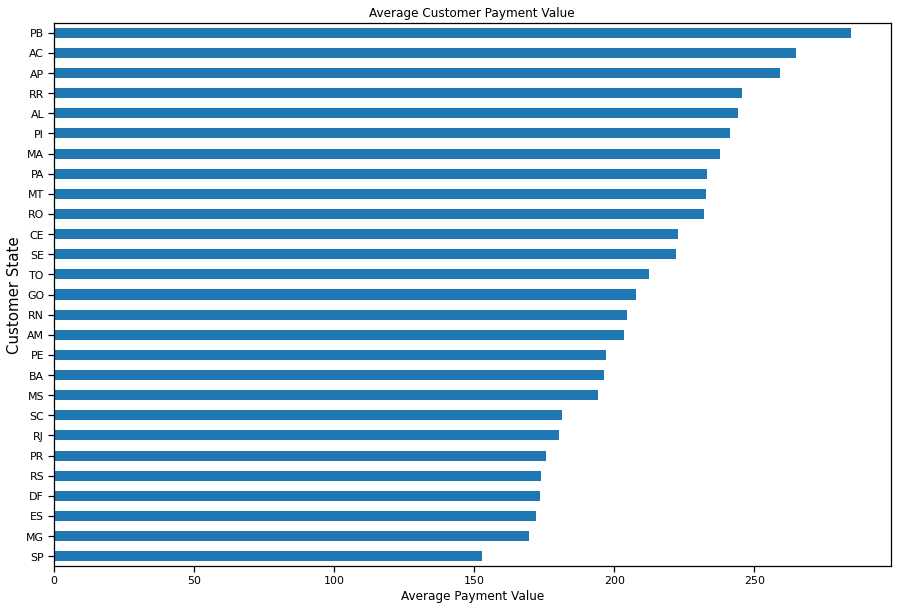

In [54]:
# Average customer payment value per state
sns.set_context('notebook')
plt.figure(figsize=(15,10))
df_merged_delivered.groupby('customer_state')['payment_value'].mean().sort_values().plot(kind='barh')
plt.ylabel('Customer State', fontsize=15)
plt.xlabel('Average Payment Value')
plt.title('Average Customer Payment Value')

Text(0.5, 1.0, 'Average Customer Payment Value')

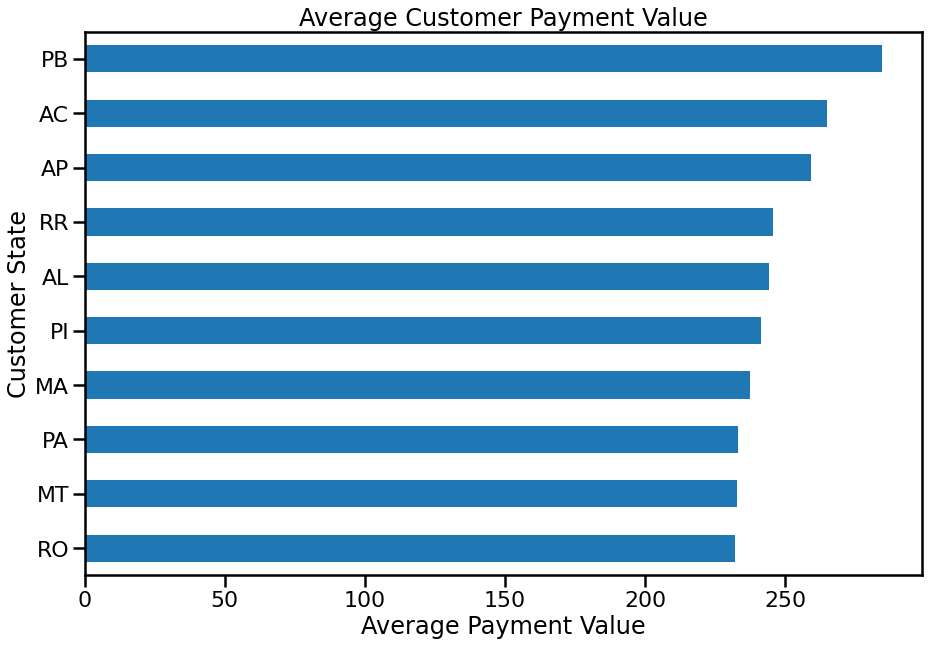

In [55]:
# get top 10 states with biggest Average Customer Payment Value
sns.set_context('poster')
plt.figure(figsize=(15,10))
df_merged_delivered.groupby('customer_state')['payment_value'].mean().sort_values(ascending=False)[:10].sort_values().plot(kind='barh')
plt.ylabel('Customer State')
plt.xlabel('Average Payment Value')
plt.title('Average Customer Payment Value')

Customers in PB, AC and AP are the customers who on average pays the most compared to customers in other states.

Text(0.5, 1.0, 'Total Customer Payment Value')

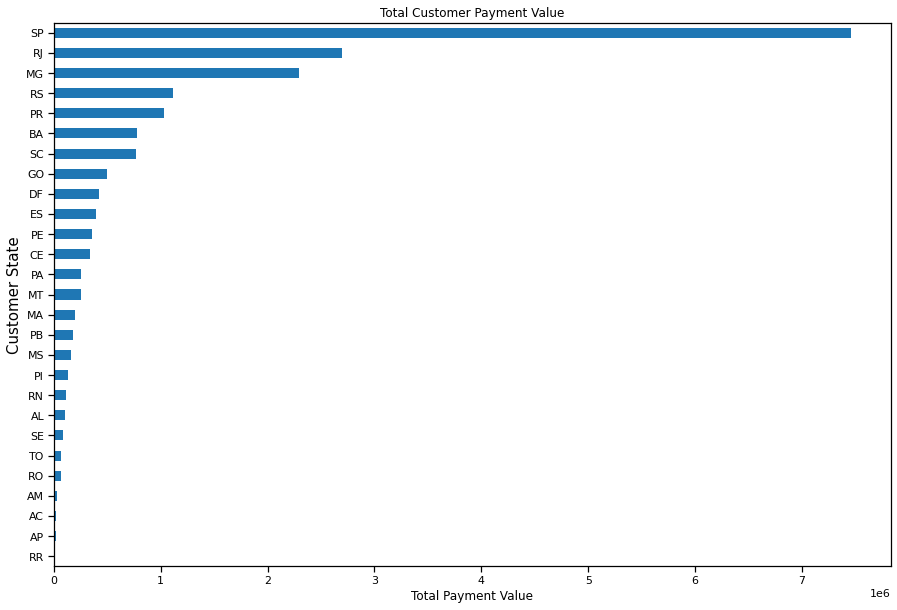

In [56]:
# see the Total Customer Payment Value for each state
sns.set_context('notebook')
plt.figure(figsize=(15,10))
df_merged_delivered.groupby('customer_state')['payment_value'].sum().sort_values().plot(kind='barh')
plt.ylabel('Customer State', fontsize=15)
plt.xlabel('Total Payment Value')
plt.title('Total Customer Payment Value')

Text(0.5, 1.0, 'Total Customer Payment Value')

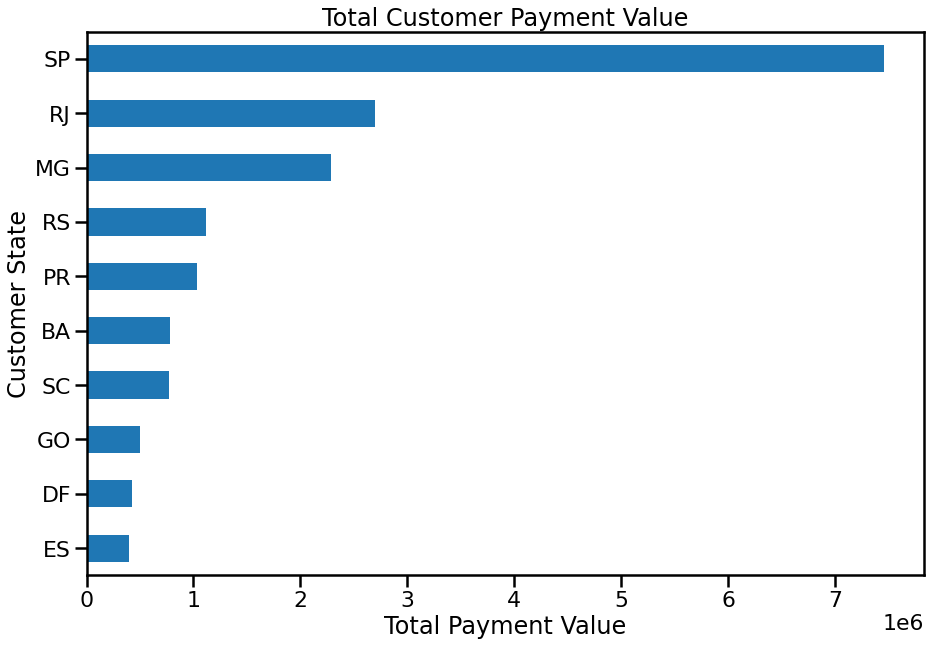

In [57]:
# get top 10 states with the biggest Total Customer Payment Value
sns.set_context('poster')
plt.figure(figsize=(15,10))
df_merged_delivered.groupby('customer_state')['payment_value'].sum().sort_values(ascending=False)[:10].sort_values().plot(kind='barh')
plt.ylabel('Customer State')
plt.xlabel('Total Payment Value')
plt.title('Total Customer Payment Value')

In line with the number of customers, the state SP is the state with the biggest total payment value. This is because there is so much customers there so the total payment value of all customers is also the largest.

Text(0.5, 1.0, 'Average Customer Freight Value')

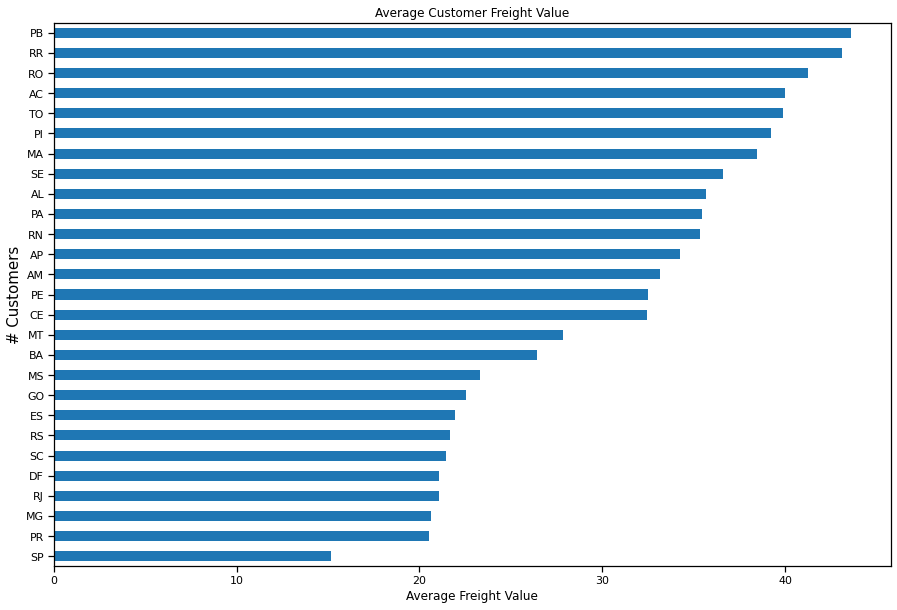

In [58]:
# get the customer freight value for each state
sns.set_context('notebook')
plt.figure(figsize=(15,10))
df_merged_delivered.groupby('customer_state')['freight_value'].mean().sort_values().plot(kind='barh')
plt.ylabel('# Customers', fontsize=15)
plt.xlabel('Average Freight Value')
plt.title('Average Customer Freight Value')

Customers in PB, RR, and RO generally pay the most freight for their orders. This may mean that most sellers are located far from these states, so customers need to pay more freight in order to get their order shipped to their doorstep. This may also mean that the customers in these states are buying heavier or larger items which costs more to be shipped.

Text(0.5, 1.0, 'Total number of customer transactions each month')

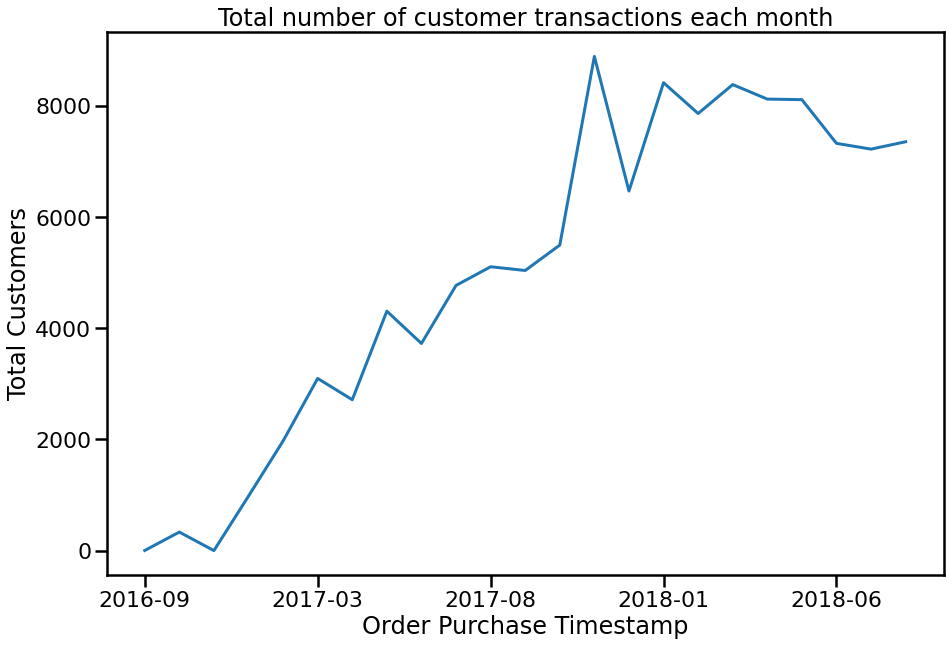

In [59]:
sns.set_context('poster')
sns.set_style(style=None,rc=None)
fig, ax = plt.subplots(figsize=(15, 10))
df_merged_delivered.groupby(df_merged_delivered['order_purchase_timestamp'].dt.strftime('%Y-%m'))['customer_unique_id'].count().plot(kind='line', ax=ax)
plt.ylabel('Total Customers')
plt.xlabel('Order Purchase Timestamp')
plt.title('Total number of customer transactions each month')

In [60]:
df_merged_delivered['item_size'] = np.where(df_merged_delivered['product_volume_cm3'] > df_merged_delivered['product_volume_cm3'].mean(),'big','small')
df_merged_delivered['weight'] = np.where(df_merged_delivered['product_weight_g'] > df_merged_delivered['product_weight_g'].mean(),'heavy','light')

<ipython-input-60-9b387fe7e1e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_delivered['item_size'] = np.where(df_merged_delivered['product_volume_cm3'] > df_merged_delivered['product_volume_cm3'].mean(),'big','small')
<ipython-input-60-9b387fe7e1e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_delivered['weight'] = np.where(df_merged_delivered['product_weight_g'] > df_merged_delivered['product_weight_g'].mean(),'heavy','light')


Text(0.5, 0, 'Weight of items')

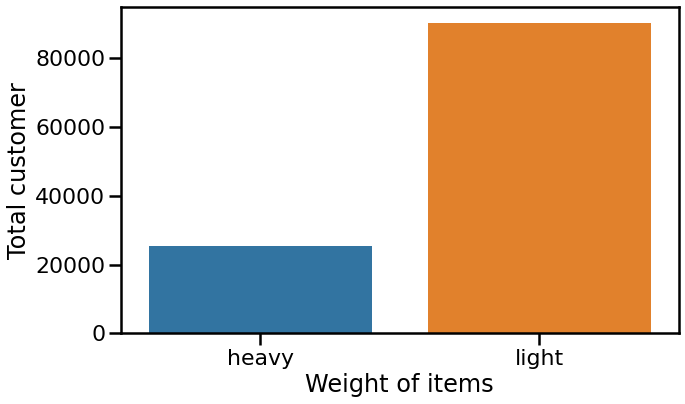

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_merged_delivered.groupby('weight')['customer_unique_id'].count().reset_index(), x='weight', y='customer_unique_id')
plt.ylabel('Total customer')
plt.xlabel('Weight of items')

Text(0.5, 0, 'Item size')

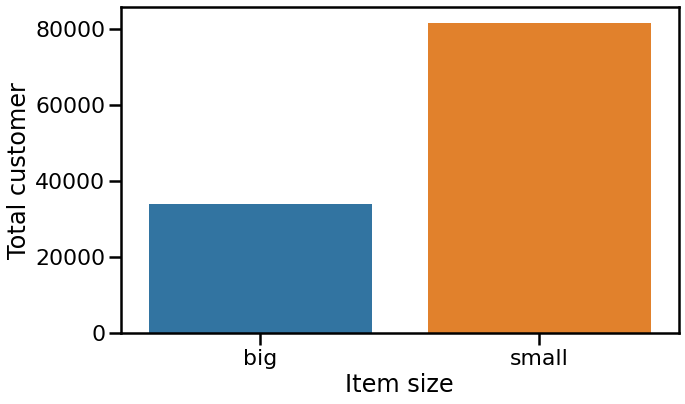

In [62]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_merged_delivered.groupby('item_size')['customer_unique_id'].count().reset_index(), x='item_size', y='customer_unique_id')
plt.ylabel('Total customer')
plt.xlabel('Item size')

Most customers are buying items that are below the average size and average item weight bought in this period.

## Feature Engineering

We have generated some new features while doing the individual table analysis. We created a `items_in_order` column in the Order Items table which consists of the number of items in an order. We also have created a `product_volume_cm3` column in the Products table which represent the volume of each product listed in the Olist website.

### Generating new features based on RFM

From the ABT, we are going to be generating some additional features based on RFM, which represents the customer lifetime value. We are going to be calculating the customers' `recency`, `frequency`, and `monetary_value`. We are also going to be finding out how long has the customer been a client of Olist by calculating the `client_since` column.

In [63]:
df_merged_delivered['order_approved_at'].max()

Timestamp('2018-08-29 15:10:26')

The latest date a where a customer paid for their order is 29 Aug 2018, so we are using 1 Sep 2018, a couple of days after the latest date as the cutoff date to calculate RFM.

In [64]:
# aggregate on customer unique id, get new features: recency, frequency, monetary_value, client_since
today = dt.datetime(2018, 9, 1)

df_merged_delivered['order_approved_at2'] = df_merged_delivered.copy()['order_approved_at']
df_grouped_cltv = df_merged_delivered.groupby('customer_unique_id').agg({'order_approved_at': lambda x: (today - x.max()).days,
                                                                              'order_id': pd.Series.nunique,
                                                                              'payment_value': sum,
                                                                              'order_approved_at2': lambda x: (today - x.min()).days})

df_grouped_cltv.rename(columns={
    'order_approved_at': 'recency',
    'order_id': 'frequency',
    'payment_value': 'monetary_value',
    'order_approved_at2': 'client_since'
}, inplace=True)

df_grouped_cltv.reset_index(inplace=True)

df_grouped_cltv

<ipython-input-64-26a2669b5924>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_delivered['order_approved_at2'] = df_merged_delivered.copy()['order_approved_at']


,customer_unique_id,recency,frequency,monetary_value,client_since
0,0000366f3b9a7992bf8c76cfdf3221e2,113.0,1,141.90,113.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,116.0,1,27.19,116.0
2,0000f46a3911fa3c0805444483337064,539.0,1,86.22,539.0
3,0000f6ccb0745a6a4b88665a16c9f078,323.0,1,43.62,323.0
4,0004aac84e0df4da2b147fca70cf8255,290.0,1,196.89,290.0
...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,449.0,1,4134.84,449.0
93354,fffea47cd6d3cc0a88bd621562a9d061,264.0,1,84.58,264.0
93355,ffff371b4d645b6ecea244b27531430a,570.0,1,112.46,570.0
93356,ffff5962728ec6157033ef9805bacc48,121.0,1,133.69,121.0


### Data Aggregation

Because each customer may order more than once, one customer may have more than one row in the merged table. Because of this, we need to aggregate the columns based on the `customer_unique_id`. There are different aggregations to be done according to each column's characteristics. Some columns are averaged and for `payment_sequential` and `payment_installments`, we calculate the maximum value because we want to find out for each customer, the largest number of sequential payment and number of installments that they did.

In [65]:
# aggregate on customer unique id
df_grouped_mean = df_merged_delivered.groupby('customer_unique_id')[
    ['price', 'freight_value', 'items_in_order', 'product_weight_g', 'product_volume_cm3', 'payment_value',
     'review_score']].mean().reset_index()

df_grouped_max = df_merged_delivered.groupby('customer_unique_id')[['payment_sequential', 'payment_installments']].max().reset_index()

In [66]:
# merge all the aggregated tables
df_grouped_mean_max = pd.merge(left=df_grouped_mean, right=df_grouped_max, on='customer_unique_id', how='inner')
df_grouped = pd.merge(left=df_grouped_mean_max, right=df_grouped_cltv, on='customer_unique_id', how='inner')

In [67]:
df_grouped.head()

,customer_unique_id,price,freight_value,items_in_order,product_weight_g,product_volume_cm3,payment_value,review_score,payment_sequential,payment_installments,recency,frequency,monetary_value,client_since
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,12.00,1.0,1500.0,7616.0,141.90,5.0,1.0,8.0,113.0,1,141.90,113.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,8.29,1.0,375.0,5148.0,27.19,4.0,1.0,1.0,116.0,1,27.19,116.0
2,0000f46a3911fa3c0805444483337064,69.00,17.22,1.0,1500.0,43750.0,86.22,3.0,1.0,8.0,539.0,1,86.22,539.0
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,17.63,1.0,150.0,1045.0,43.62,4.0,1.0,4.0,323.0,1,43.62,323.0
4,0004aac84e0df4da2b147fca70cf8255,180.00,16.89,1.0,6050.0,528.0,196.89,5.0,1.0,6.0,290.0,1,196.89,290.0


In [68]:
df_grouped.shape

(93358, 14)

In [69]:
df_grouped.isnull().sum()

customer_unique_id        0
price                     0
freight_value             0
items_in_order            0
product_weight_g         13
product_volume_cm3       13
payment_value             1
review_score            603
payment_sequential        1
payment_installments      1
recency                  13
frequency                 0
monetary_value            0
client_since             13
dtype: int64

We need to impute the missing data from certain columns. In order to do that, we need to check whether the data in those columns are normally distributed.

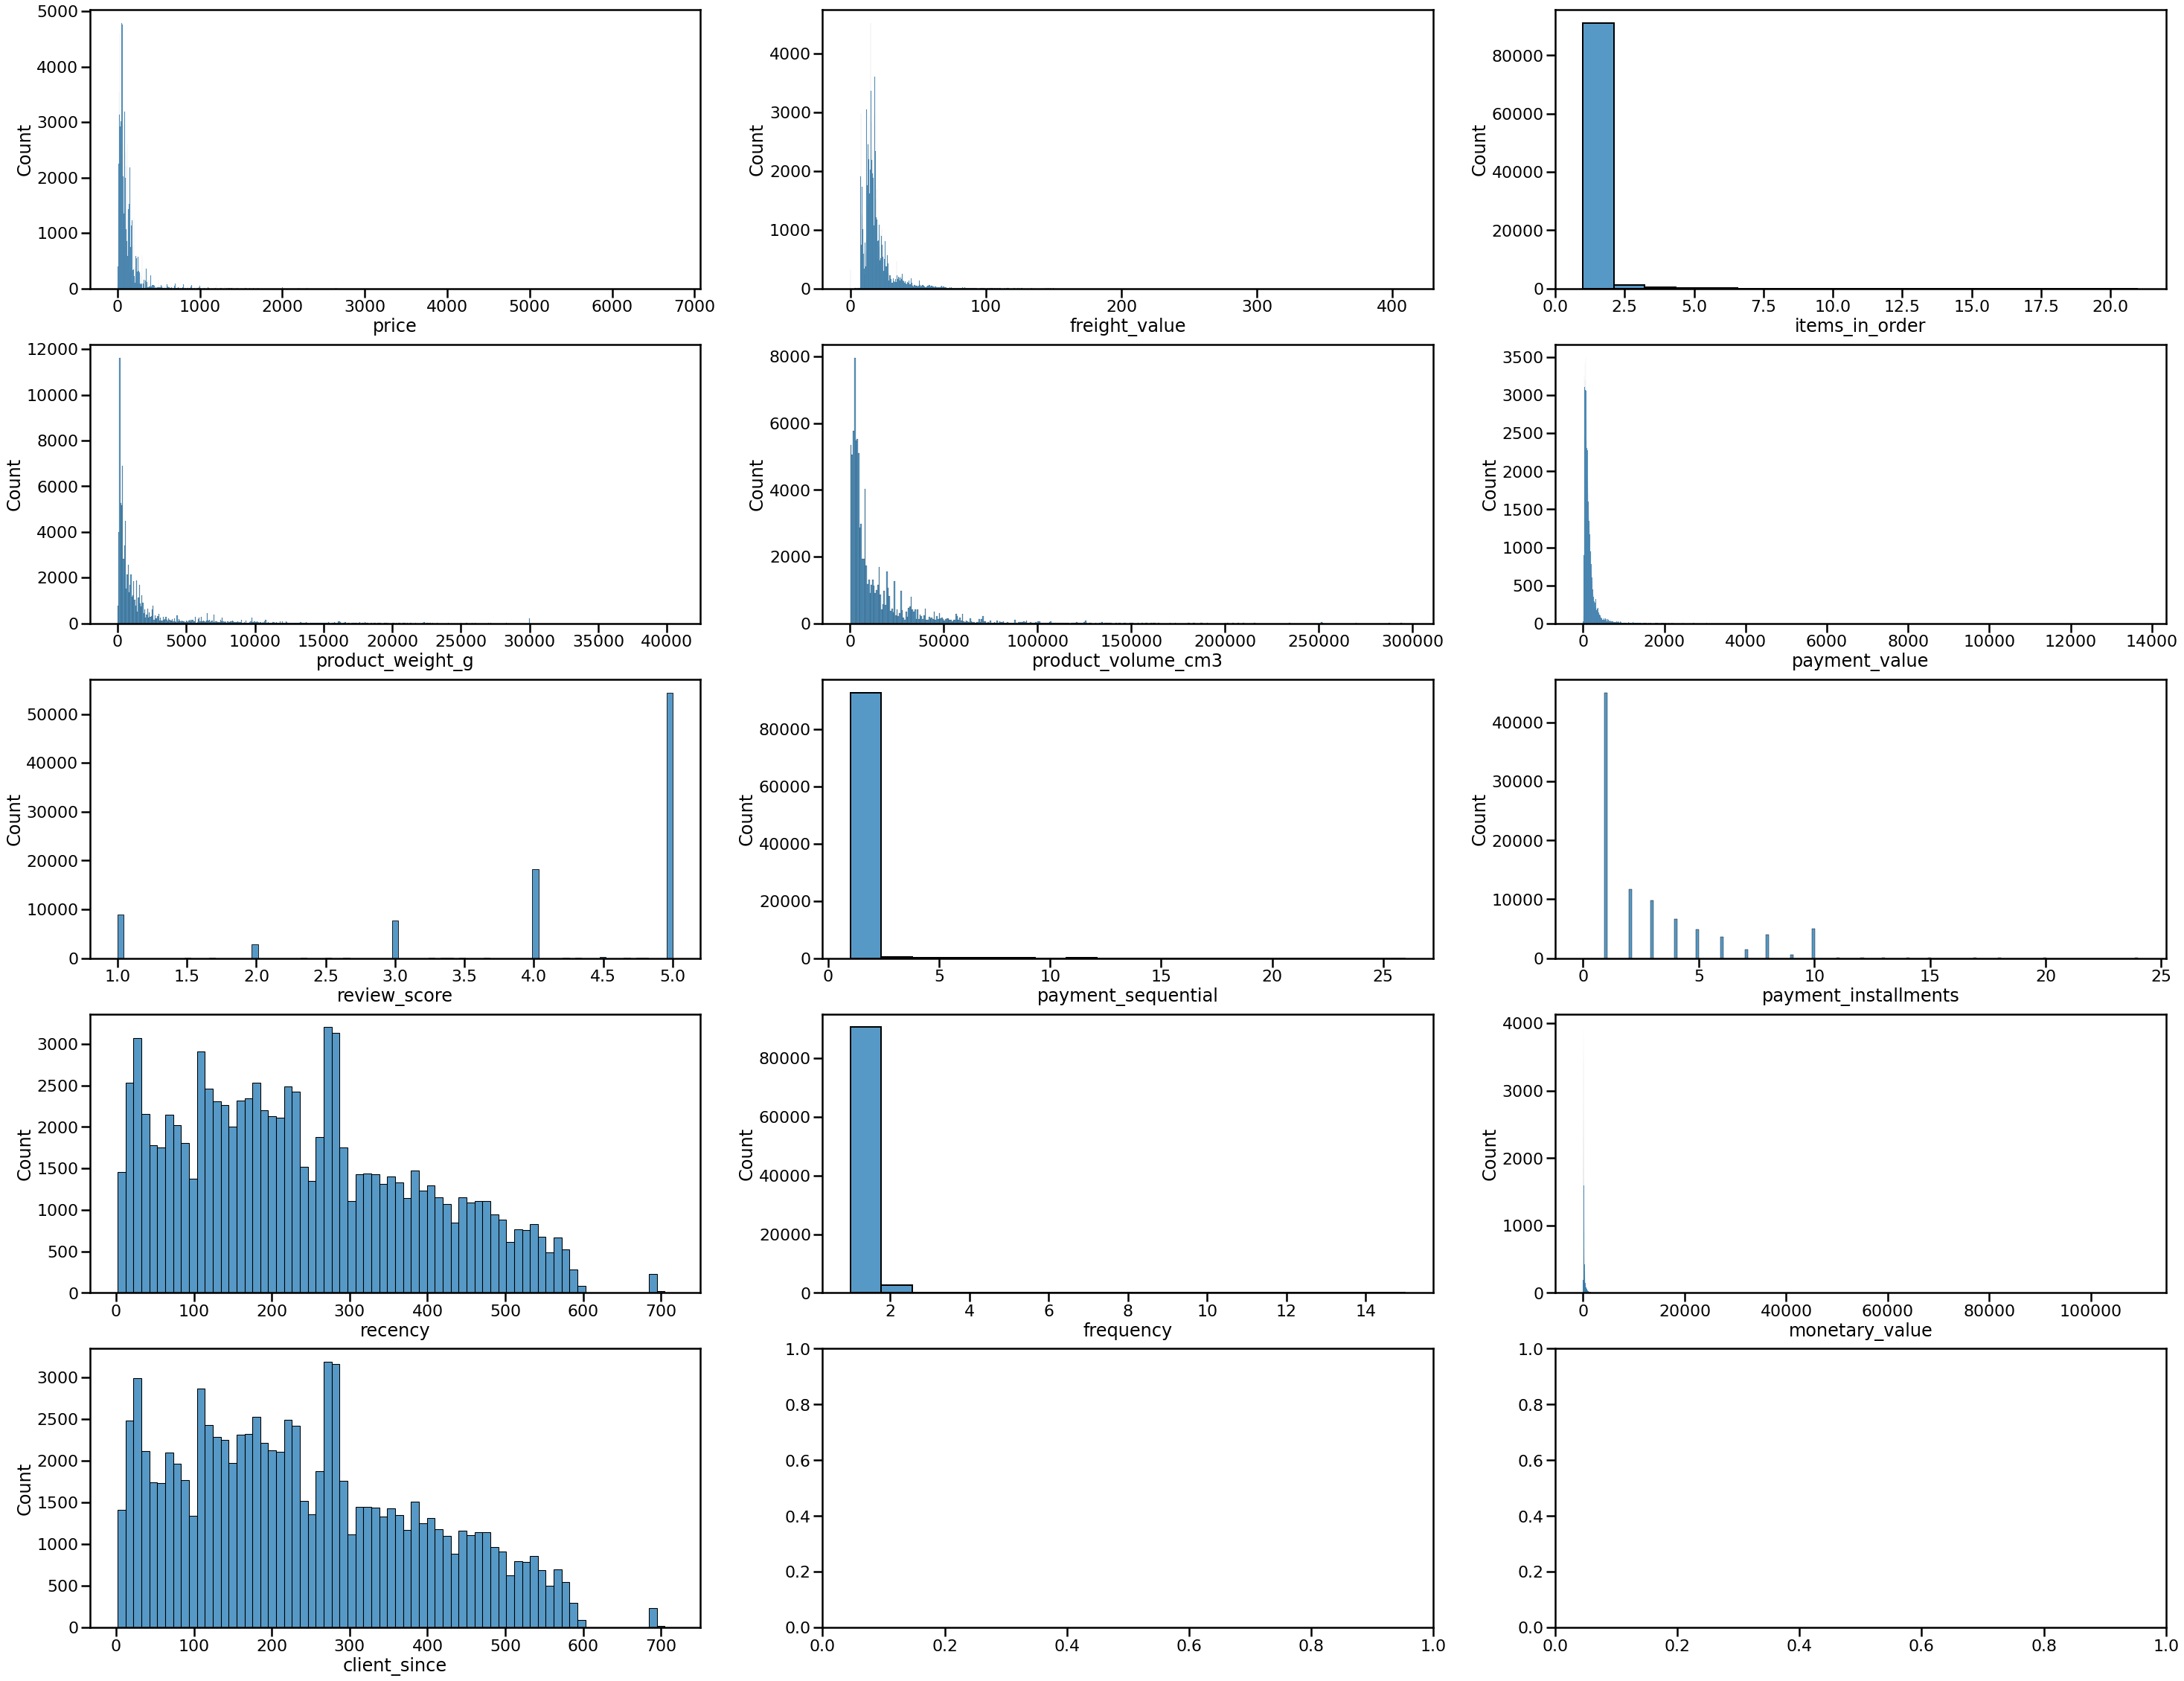

In [70]:
fig, ax = plt.subplots(5, 3, figsize=(50, 40))

for ix, var in enumerate(df_grouped.columns[1:]):
        sns.histplot(df_grouped[var], ax=ax.flatten()[ix])

We can see that all the columns are not normally distributed. Therefore we need to use the median when imputing the data, not mean.

## Handling Null Values

In [71]:
null_columns = ['product_weight_g', 'product_volume_cm3', 'payment_value', 'review_score', 'payment_sequential',
                'payment_installments', 'recency', 'client_since']

In [72]:
# imputing null values with median
for column in null_columns:
    df_grouped[column].fillna(value=df_grouped[column].median(), inplace=True)

In [73]:
df_grouped.isnull().sum()

customer_unique_id      0
price                   0
freight_value           0
items_in_order          0
product_weight_g        0
product_volume_cm3      0
payment_value           0
review_score            0
payment_sequential      0
payment_installments    0
recency                 0
frequency               0
monetary_value          0
client_since            0
dtype: int64

For further analysis, the `customer_unique_id` column is not needed because it is just an identifier of each customer, not a characterizing feature of each customer themselves. But we are preserving the `customer_unique_id` information in another table, which keeps the original values.

In [74]:
# preserve original table in a new dataframe
df_grouped_ori = df_grouped.copy()

# drop customer unique id column
df_grouped.drop(columns='customer_unique_id', inplace=True)

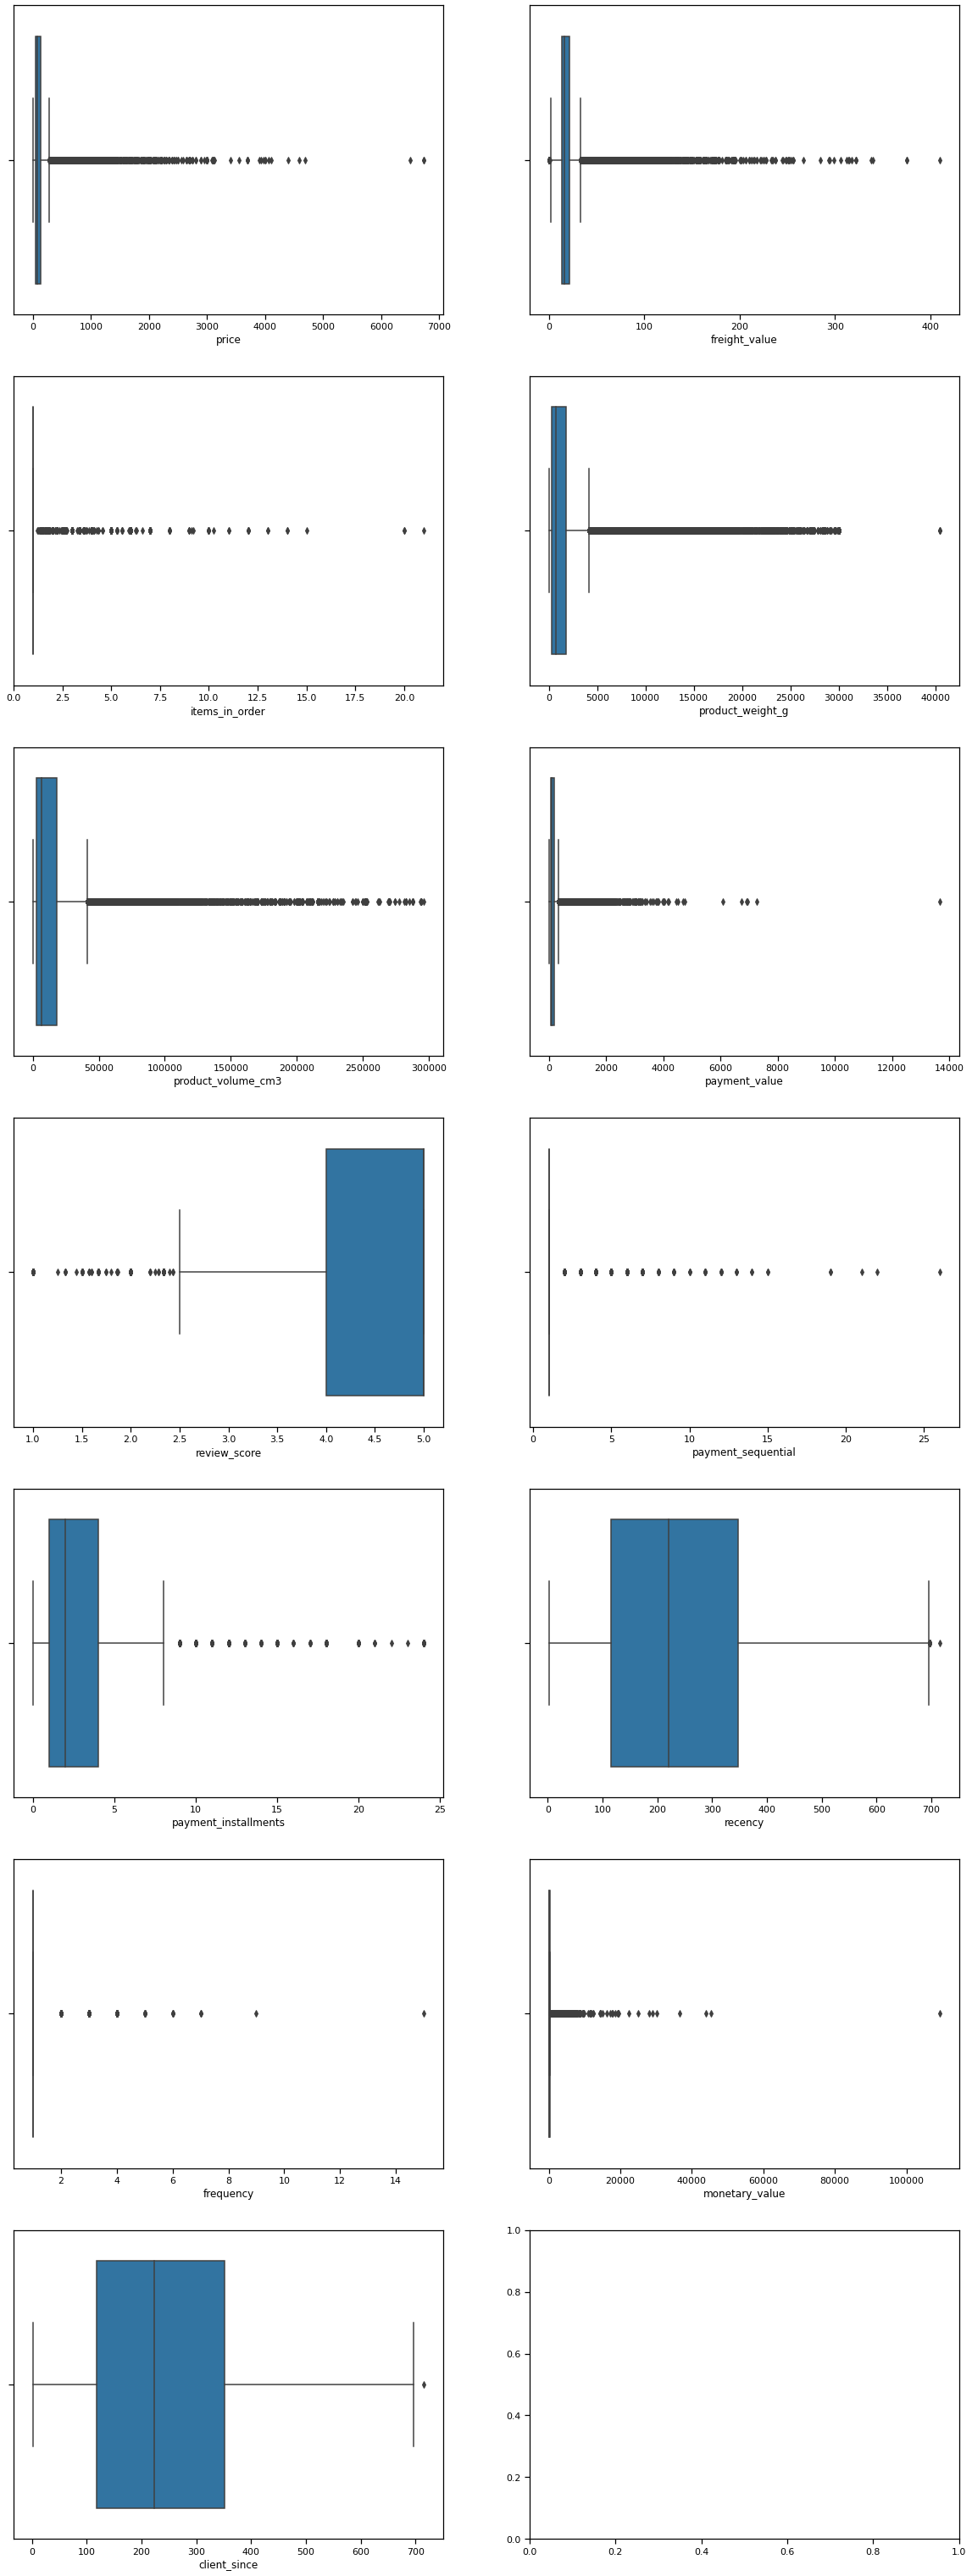

In [75]:
# checking for outliers
sns.set_context('notebook')
fig, ax = plt.subplots(7, 2, figsize=(20, 55))

for ix, var in enumerate(df_grouped.columns):
    sns.boxplot(x=df_grouped[var], ax=ax.flatten()[ix])

From the boxplots, we can see that most of our variables contain a lot of outliers, therefore when we are rescaling, it's important to use Robust Scaler which can better handle the outliers.

# Modeling

In [76]:
df_grouped.head()

,price,freight_value,items_in_order,product_weight_g,product_volume_cm3,payment_value,review_score,payment_sequential,payment_installments,recency,frequency,monetary_value,client_since
0,129.90,12.00,1.0,1500.0,7616.0,141.90,5.0,1.0,8.0,113.0,1,141.90,113.0
1,18.90,8.29,1.0,375.0,5148.0,27.19,4.0,1.0,1.0,116.0,1,27.19,116.0
2,69.00,17.22,1.0,1500.0,43750.0,86.22,3.0,1.0,8.0,539.0,1,86.22,539.0
3,25.99,17.63,1.0,150.0,1045.0,43.62,4.0,1.0,4.0,323.0,1,43.62,323.0
4,180.00,16.89,1.0,6050.0,528.0,196.89,5.0,1.0,6.0,290.0,1,196.89,290.0


In [77]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93358 entries, 0 to 93357
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 93358 non-null  float64
 1   freight_value         93358 non-null  float64
 2   items_in_order        93358 non-null  float64
 3   product_weight_g      93358 non-null  float64
 4   product_volume_cm3    93358 non-null  float64
 5   payment_value         93358 non-null  float64
 6   review_score          93358 non-null  float64
 7   payment_sequential    93358 non-null  float64
 8   payment_installments  93358 non-null  float64
 9   recency               93358 non-null  float64
 10  frequency             93358 non-null  int64  
 11  monetary_value        93358 non-null  float64
 12  client_since          93358 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 10.0 MB


## Scaling

We need to scale the data because we have numerical data with different scales (e.g. 1-5 for review, but thousands for product weight). This is important because K-Means algorithm is based on euclidean distances so having features with different scales can negatively impact the results.

In [78]:
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_grouped), columns=df_grouped.columns)

In [79]:
df_scaled

,price,freight_value,items_in_order,product_weight_g,product_volume_cm3,payment_value,review_score,payment_sequential,payment_installments,recency,frequency,monetary_value,client_since
0,0.524742,-0.561381,0.0,0.524590,0.070630,0.336053,0.0,0.0,2.000000,-0.461207,0.0,0.207193,-0.472103
1,-0.619588,-1.035806,0.0,-0.213115,-0.089145,-0.670175,-1.0,0.0,-0.333333,-0.448276,0.0,-0.619203,-0.459227
2,-0.103093,0.106138,0.0,0.524590,2.409892,-0.152368,-2.0,0.0,2.000000,1.375000,0.0,-0.193938,1.356223
3,-0.546495,0.158568,0.0,-0.360656,-0.354767,-0.526053,-1.0,0.0,0.666667,0.443966,0.0,-0.500837,0.429185
4,1.041237,0.063939,0.0,3.508197,-0.388237,0.818421,0.0,0.0,1.333333,0.301724,0.0,0.603354,0.287554
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93353,7.278351,29.708440,1.0,19.213115,15.867415,17.226579,0.0,0.0,2.666667,0.987069,0.0,28.973218,0.969957
93354,-0.145464,0.421995,0.0,0.668852,1.654134,-0.166754,-1.0,0.0,-0.333333,0.189655,0.0,-0.205753,0.175966
93355,0.112371,0.789003,0.0,-0.065574,-0.207811,0.077807,0.0,0.0,-0.333333,1.508621,0.0,-0.004899,1.489270
93356,0.371134,0.294118,0.0,-0.167869,-0.132390,0.264035,0.0,0.0,1.000000,-0.426724,0.0,0.148047,-0.437768


## Dimensionality Reduction

In [80]:
pca = PCA(n_components=df_scaled.shape[1])
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=df_scaled.columns)
pd.DataFrame(pca.explained_variance_ratio_ * 100)

,0
0,55.542325
1,22.250084
2,8.792330
3,3.934977
4,3.591714
5,1.899177
6,1.574213
7,1.341483
8,0.469072
9,0.328065


From the above results, we chose 2 components because it covers 77% information (explained variance).

In [81]:
pca = PCA(n_components=2)
df_pca_final = pd.DataFrame(pca.fit_transform(df_scaled))
df_pca_final.head()

,0,1
0,-0.708385,0.638300
1,-2.278286,1.734910
2,-0.998096,-0.409579
3,-1.945058,1.300381
4,0.418246,-1.458355


## Clustering

In [82]:
# calculating inertia of multiple number of clusters
start_time = time.time()
k = range(1, 11)
inertia = []

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(df_pca_final)
    inertia.append(kmeans.inertia_)
    

print('The code takes {} seconds to run'.format(time.time() - start_time))
# inertia

The code takes 17.714367866516113 seconds to run


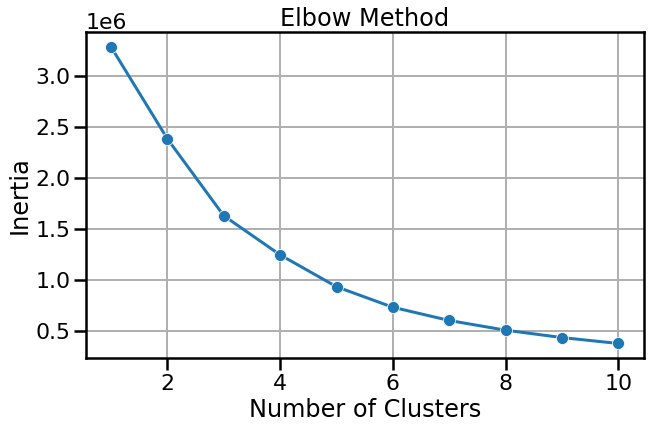

In [83]:
# visualizing elbow method chart
sns.set_context('poster')
plt.figure(figsize=(10, 6))
sns.lineplot(x=k, y=inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

From the Elbow Method graph, we can see that 3-4 clusters is the optimum number of clusters because further additions to the number of clusters do not reduce the inertia significantly. In order to make a decision, we need to also look at the silhouette score for each number of clusters.

In [84]:
# calculating silhouette score of multiple number of clusters
start_time = time.time()
k = range(2, 6)
score = []

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=10)
    labels = kmeans.fit_predict(df_pca_final)
    score.append(silhouette_score(df_pca_final, labels))

print('The code takes {} seconds to run'.format(time.time() - start_time))
score

The code takes 407.5981993675232 seconds to run


[0.7914669299959696,
 0.7735173725196712,
 0.7711004027753678,
 0.7076846302777231]

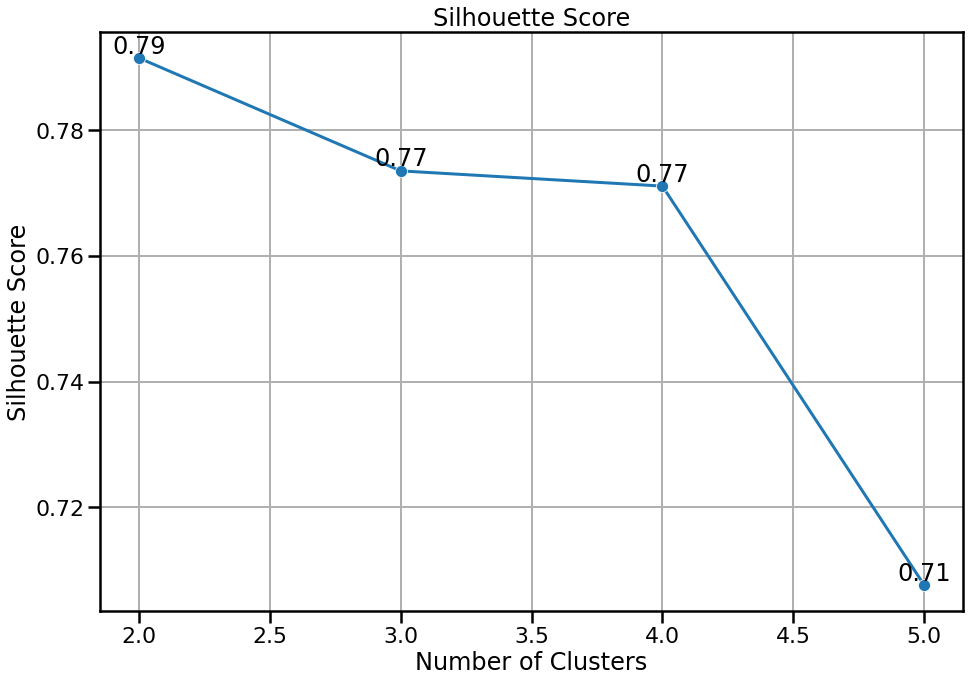

In [85]:
# visualizing silhouette score chart
plt.figure(figsize=(14, 10))
sns.lineplot(x=k, y=score, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

for x, y in zip(k, score):
    label = "{:.2f}".format(y)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='center')
plt.tight_layout()
plt.show()

From the silhouette score, we can see that from 3 to 4 clusters doesn't reduce the silhouette score, but based on the elbow method, 4 clusters can quite reduce the inertia from around 1.6 in 3 clusters to around 1.2 in 4 clusters. Therefore we are choosing 4 clusters to be the optimum number of clusters.

## Re-train K-Means using 4 clusters

In [86]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pca_final)
labels = kmeans.labels_

In [87]:
# pickling the model to ensure consistency
pickle.dump(kmeans, open('Model/model.pkl', 'wb'))

In [88]:
# loading the pickled model
pickled_kmeans = pickle.load(open('Model/kmeans.pkl', 'rb'))

C:\Users\nikoy\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator KMeans from version 1.0.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [89]:
labels = pickled_kmeans.labels_

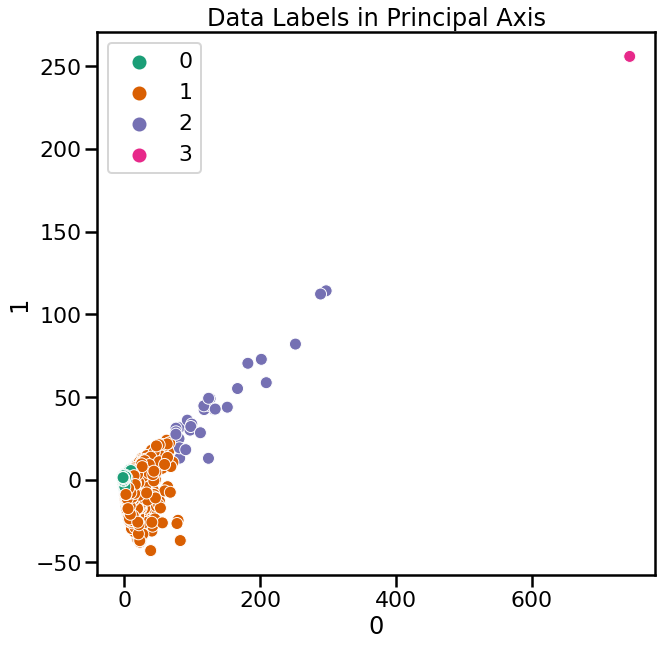

In [90]:
sns.set_context('poster')
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_pca_final[0],y=df_pca_final[1],hue=labels, palette='Dark2')
plt.title('Data Labels in Principal Axis')
plt.show()

In [91]:
# labelling each datapoint in the original dataset
df_grouped_ori['labels'] = labels

In [92]:
df_grouped_ori.head()

,customer_unique_id,price,freight_value,items_in_order,product_weight_g,product_volume_cm3,payment_value,review_score,payment_sequential,payment_installments,recency,frequency,monetary_value,client_since,labels
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,12.00,1.0,1500.0,7616.0,141.90,5.0,1.0,8.0,113.0,1,141.90,113.0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,8.29,1.0,375.0,5148.0,27.19,4.0,1.0,1.0,116.0,1,27.19,116.0,0
2,0000f46a3911fa3c0805444483337064,69.00,17.22,1.0,1500.0,43750.0,86.22,3.0,1.0,8.0,539.0,1,86.22,539.0,0
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,17.63,1.0,150.0,1045.0,43.62,4.0,1.0,4.0,323.0,1,43.62,323.0,0
4,0004aac84e0df4da2b147fca70cf8255,180.00,16.89,1.0,6050.0,528.0,196.89,5.0,1.0,6.0,290.0,1,196.89,290.0,0


In [93]:
df_grouped_ori['customer_unique_id'].nunique()

93358

In [94]:
# summarizing each segment's characteristics
df_grouped_ori.groupby('labels').mean().reset_index()

,labels,price,freight_value,items_in_order,product_weight_g,product_volume_cm3,payment_value,review_score,payment_sequential,payment_installments,recency,frequency,monetary_value,client_since
0,0,97.212225,17.751678,1.118722,1442.144944,11607.977263,121.863316,4.175681,1.045425,2.763577,238.796856,1.032622,150.711391,241.429541
1,1,504.220442,52.353498,1.406973,10832.846556,62406.658385,622.582022,3.943322,1.049954,5.247785,240.651237,1.043080,932.657727,243.411091
2,2,305.075468,37.648546,9.388968,5220.997648,32773.490765,2205.374883,2.547619,1.000000,4.533333,208.300000,1.233333,19618.989667,211.700000
3,3,1680.000000,28.010000,8.000000,750.000000,4096.000000,13664.080000,1.000000,1.000000,1.000000,333.000000,1.000000,109312.640000,333.000000


In [98]:
df_grouped_ori[df_grouped_ori['labels']==3]

,customer_unique_id,price,freight_value,items_in_order,product_weight_g,product_volume_cm3,payment_value,review_score,payment_sequential,payment_installments,recency,frequency,monetary_value,client_since,labels
3724,0a0a92112bd4c708ca5fde585afaa872,1680.0,28.01,8.0,750.0,4096.0,13664.08,1.0,1.0,1.0,333.0,1,109312.64,333.0,3


In [96]:
# transposing the summarized table into a more discernible form
df_grouped_ori.groupby('labels').mean().reset_index().T

,0,1,2,3
labels,0.000000,1.000000,2.000000,3.00
price,97.212225,504.220442,305.075468,1680.00
freight_value,17.751678,52.353498,37.648546,28.01
items_in_order,1.118722,1.406973,9.388968,8.00
product_weight_g,1442.144944,10832.846556,5220.997648,750.00
product_volume_cm3,11607.977263,62406.658385,32773.490765,4096.00
payment_value,121.863316,622.582022,2205.374883,13664.08
review_score,4.175681,3.943322,2.547619,1.00
payment_sequential,1.045425,1.049954,1.000000,1.00
payment_installments,2.763577,5.247785,4.533333,1.00


In [97]:
# calculating each segment's sizing
df_grouped_ori.groupby('labels')[['price']].count()

,price
labels,
0,86781
1,6546
2,30
3,1


# Conclusion and Recommendation

In general there are 3 groups of customers who are using Olist, and 1 exceptional buyer who doesn't fit into any groups.

1.   The first group is the majority of customers in Olist, as the size of this group is 86781, consisting of more than 90% of customers. These customers are buying products with low prices, relatively small in size, have low freight value (can be associated with the product size or seller-customer location), and few items per order. These customers also tend to give the highest reviews compared to other customer segments but have the lowest buying frequency. We are naming this group the **Cheap Product Buyers** due to the low prices of products they bought.

  For these customers, we can recommend them lower-priced and small products. Because their orders usually have low freight value, this can also mean that they tend to buy from sellers who are close in location to them. In order to cater to these customers, we can figure out where most of these customers live and acquire more sellers in the area if we don't already have sufficient sellers.
    

2.   The second group consists of 6546 customers. This group bought the most expensive items and on average they bought the largest products by weight as well as volume. This also led to them having the highest freight value. These customers also tend to make their payments using the highest number of installments. Their payment are of medium value, as well as their review scores, recency, frequency, and monetary value. As a result of them buying expensive items, we are naming them **Expensive Product Buyers**.

  These customers tend to buy the expensive, heavy and large items, so we can give them promotions relating to products with that description, such as furniture. They also tend to pay in the most installments compared to other groups, so we can give them certain promotions if they are paying using multiple installments. We can do a deep dive for these customers to find out exactly what categories does these customers like to buy, make sure we have sufficient supply of that category and market those products to this group.


3.   The third group are a niche group of customers, having only 30 customers out of 93358 total customers in this dataset. These customers bought the most items in an order compared to other groups, averaging 9.3 items compared to other groups which only averages around 1 item. Even though they bought the largest number of items in an order, the product weight and volume is not the largest, and therefore the freight value is also not the most expensive. They also did the least sequential payments compared to their counterparts, but not the least payment installments. We must pay attention to them giving the lowest rating out of all the other groups. They only rated 2.55 on average compared to 4.18 for the `Cheap Product Buyers` and 3.94 for the `Expensive Product Buyers`. This is especially important because they gave the most monetary value to the company, more than 20x the value of `Expensive Product Buyers`. They are also the most recent and most frequent buyers compared to the other groups. We are naming them **Multiple Product Buyers** due to the most number of items in their orders.

  Even though this group contain only a small number of customers, their monetary value is very high, so we have to really make sure that these customers have a high retention rate. They bought the largest number items in an order compared to other groups so we can give them promotions for buying items in bulk, or providing bundling discounts to make sure their needs are met. Because this group gave low review score, we need to make sure we know why this is happening and do what we can to improve this condition.


4.   As for the 1 **Exceptional Customer**, they are buying the most expensive products with relatively low freight value, but they bought a lot of items in an order, only second to the Expensive Product Buyers. Their products are the lightest and smallest. Because of the highly-priced product, they also have the highest payment value. But we must pay attention to this customer because they gave a review score of only 1, with the longest recency from their last order (it has been 333 days since they last ordered and this was their first order).

  We think that because this customer is an outlier, we don't have to tailor a marketing strategy just for this customer, but we can make sure to give great service to them by following up on their review score because it was very low, and why they didn't order from Olist again.